In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [46]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [47]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [48]:
train_labels[0]

1

In [49]:
max([max(sequence) for sequence in train_data])

9999

In [50]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [51]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [52]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [53]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [54]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Step 1 :

1. Sequential Three layered approach  
2. Replaced relu with tanh
3. optimizers changed to adam and loss to mse and metrics == accuracy

In [70]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(16, activation="tanh"))
model.add(Dense(16, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [71]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1667 - accuracy: 0.7984 - val_loss: 0.1114 - val_accuracy: 0.8654
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0778 - accuracy: 0.9121 - val_loss: 0.0865 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0509 - accuracy: 0.9445 - val_loss: 0.0836 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0360 - accuracy: 0.9643 - val_loss: 0.0845 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0264 - accuracy: 0.9769 - val_loss: 0.0870 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0197 - accuracy: 0.9847 - val_loss: 0.0909 - val_accuracy: 0.8791
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0154 - accuracy: 0.9881 - val_loss: 0.0928 - val_accuracy: 0.8768
Epoch 8/20
30

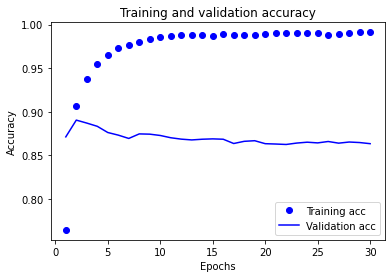

In [57]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [58]:
# Step 2 

### implement dropouts and Regularizers
### check performance by changing the dense layers to 64 hidden units

from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid",activity_regularizer=regularizers.L2(0.01)))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 1s 27ms/step - loss: 0.1577 - accuracy: 0.7748 - val_loss: 0.0918 - val_accuracy: 0.8819
Epoch 2/30
30/30 [==============================] - 1s 19ms/step - loss: 0.0722 - accuracy: 0.9091 - val_loss: 0.0908 - val_accuracy: 0.8830
Epoch 3/30
30/30 [==============================] - 1s 19ms/step - loss: 0.0548 - accuracy: 0.9350 - val_loss: 0.0928 - val_accuracy: 0.8817
Epoch 4/30
30/30 [==============================] - 1s 19ms/step - loss: 0.0436 - accuracy: 0.9515 - val_loss: 0.0960 - val_accuracy: 0.8826
Epoch 5/30
30/30 [==============================] - 1s 19ms/step - loss: 0.0363 - accuracy: 0.9612 - val_loss: 0.1040 - val_accuracy: 0.8761
Epoch 6/30
30/30 [==============================] - 1s 22ms/step - loss: 0.0312 - accuracy: 0.9681 - val_loss: 0.1076 - val_accuracy: 0.8735
Epoch 7/30
30/30 [==============================] - 1s 19ms/step - loss: 0.0292 - accuracy: 0.9705 - val_loss: 0.1097 - val_accuracy: 0.8742
Epoch 8/30
30

In [59]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

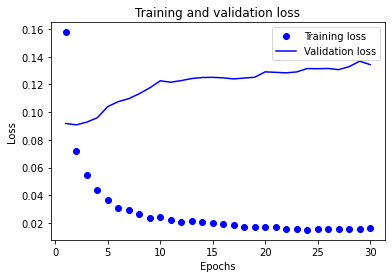

In [60]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

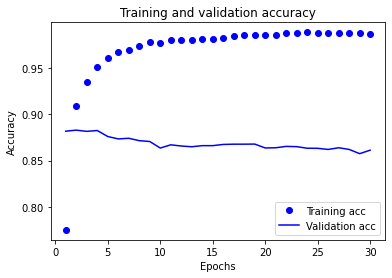

In [61]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [63]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


model = keras.Sequential()
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh",activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="tanh"))
model.add(Dense(64, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 2s 55ms/step - loss: 0.1747 - accuracy: 0.7810 - val_loss: 0.1038 - val_accuracy: 0.8846
Epoch 2/30
30/30 [==============================] - 1s 38ms/step - loss: 0.0845 - accuracy: 0.9148 - val_loss: 0.0954 - val_accuracy: 0.8852
Epoch 3/30
30/30 [==============================] - 1s 30ms/step - loss: 0.0608 - accuracy: 0.9402 - val_loss: 0.0982 - val_accuracy: 0.8802
Epoch 4/30
30/30 [==============================] - 1s 29ms/step - loss: 0.0486 - accuracy: 0.9518 - val_loss: 0.1003 - val_accuracy: 0.8784
Epoch 5/30
30/30 [==============================] - 1s 27ms/step - loss: 0.0392 - accuracy: 0.9609 - val_loss: 0.1071 - val_accuracy: 0.8704
Epoch 6/30
30/30 [==============================] - 1s 29ms/step - loss: 0.0324 - accuracy: 0.9669 - val_loss: 0.1082 - val_accuracy: 0.8734
Epoch 7/30
30/30 [==============================] - 1s 25ms/step - loss: 0.0298 - accuracy: 0.9705 - val_loss: 0.1152 - val_accuracy: 0.8698
Epoch 8/30
30

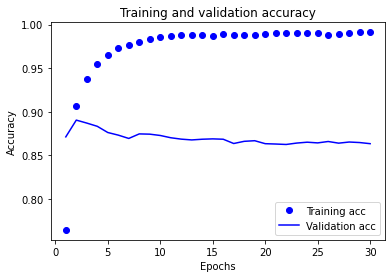

In [44]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Summary  
Significance:
My approach towards the problem, initially learned the importance of keras Sequential model which is stack of layers for building neural network.
It contains the important imports like, layers, Dense, Dropouts and Regularizers required to design a neural network
These are required imports


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
 
•	I implemented 2, 3 layered and 6 layered neural network with 16 ,64, 64 hidden neurons to check the performance.
•	One important thing that I observed is no matter how many layers we stacked up, it will train and gives the almost same performance once it reaches the threshold.
model = keras.Sequential()
it follows the structure like input layer  hidden layers  output layer 
The above line initializes the Sequential model where we can build up stack of layers.
model.add(Dense(64, activation="tanh"))
•	The above line signifies that we are adding a new hidden layer with 64 dense units using tanh activation function.
•	When I say 64 hidden units, we can assume that they are 64 neuron are being created in the layer to learn the data which is in form of vectors
•	Activation function is also called transfer function, if the output range of function is limited, just sigmoid squashed the value to 1 which is above to it. They are non linear functions.
model.add(Dropout(0.5)) 
•	The importance of Dropout is useful when we have a scenario of overfitting. The above line says, hey please randomly dropout some of my neurons since it causes overfitting. When I say 0.5, that implies 50 percent of my neurons are dropped out.
•	I have tried using L1 and L2 regularizes but that does not cause much effect rather it diminishes performance. I think the model Is saturated and the best validation accuracy we can get a range of 86 or 87 percentage.
•	Replaced binary_crossentrophy with mean square error to check the performance metrics on the loss.
•	The result is that validation loss has performed good. Initially when using binary_crossentrophy the validation loss is 0.5 but when using mse it reduces to 0.1.
•	Relu being the top among sigmoid and tanh function because of vanishing gradient problem. In this context tanh performs same as tanh.


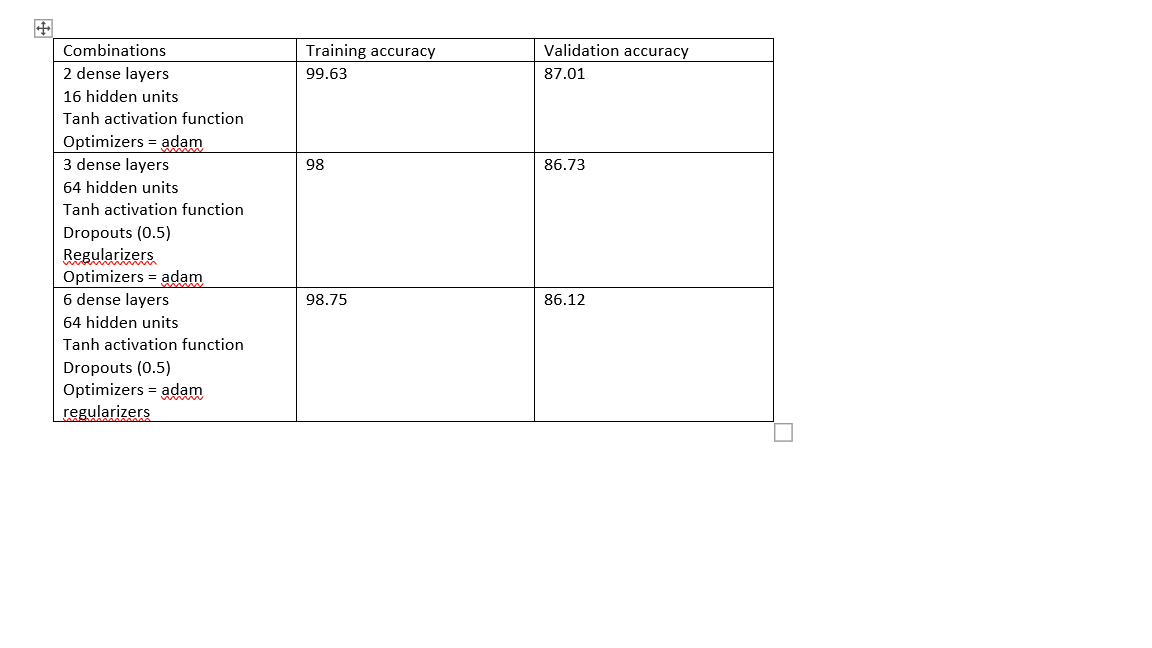